0.8840579710144928
[ 366.10729781] 
 [ 124.31306384]


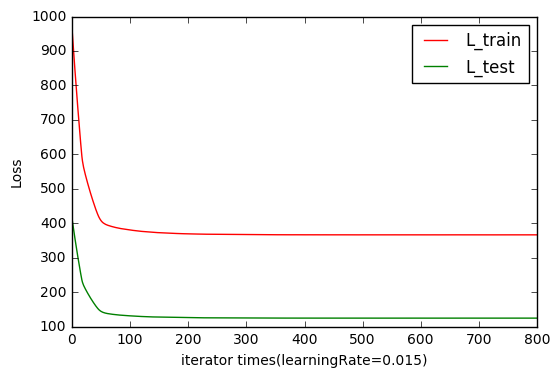

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_svmlight_file

G=np.zeros((15,1))
D=np.zeros((15,1))

L_train=np.zeros((800,1))
L_test=np.zeros((800,1))

C = 2
learningRate=0.015

data = load_svmlight_file("australian_scale.txt")
X, y = data[0], data[1]

X=X.dot(np.eye(14))
b=np.ones((690,1))
X=np.column_stack((X,b))

#多次试验后，random_state为10的时候准确率true最高
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

w=np.zeros((15,1))

#690
m=X.shape[0]
#483
n_train=X_train.shape[0]
#207
n_test=X_test.shape[0]

y = y.reshape(690,1)
y_train = y_train.reshape(483,1)
y_test = y_test.reshape(207,1)


for i in range(800):
    M_train = 1-y_train*(X_train.dot(w))
    M_train[M_train<0] = 0
    M_test = 1-y_test*(X_test.dot(w))
    M_test[M_test<0] = 0
    for j in range(n_train):
        if M_train[j]>0:
            G = G+(y_train[j]*X_train[j,:]).reshape(15,1)
    G=w-C*G/n_train
    D=-G
    w=w+learningRate*D
    #hinge损失
    L_train[i] = sum(w*w)/2 + C*sum(M_train)
    L_test[i] = sum(w*w)/2 + C*sum(M_test)

f = X_test.dot(w)
for k in range(n_test):
    if f[k]>=0:
        f[k]=1
    else:
        f[k]=-1

true=0
for j in range(n_test):
    if f[j]==y_test[j]:
        true = true + 1;

T = true/n_test
x = np.arange(0,800,1)
%matplotlib inline
plt.plot(x,L_train,'r',label='L_train')
plt.plot(x,L_test,'g',label='L_test')
plt.legend(loc='upper right')
plt.xlabel('iterator times(learningRate=0.015)')
plt.ylabel('Loss')
print(T)




In [1]:
.
.

P

NameError: name 'P' is not defined

In [1]:
print(data[0])

NameError: name 'data' is not defined